# ---------------------------Speech Emotion Recognition--------------------------------

# Import The Required Variables

In [1]:
#Install all the Reqiuired Libraries and Packages 

import pandas as pd               #Data analysis process
import numpy as np                #For array and numerical value
import os                         #Interact with os(create,change,identify contents in os)
import librosa                    #Python package for music and audio analysis
import librosa.display            #Display a spectrogram/chromagram/cqt/etc.
import librosa as lr 
import cv2                        #It displays an open source vision in a window  
import noisereduce as nr          #To reduce background noise from a audio signal     
import soundfile                  #Audio Library
import matplotlib.pyplot as plt   #Collection of command style functions that make matplotlib work like MATLAB
import scipy.signal as signal      #The signal processing toolbox currently contains some filtering functions, a limited set of  
                                  #filter design tools,and a few B-spline interpolation algorithms for 1- and 2-D data.
import seaborn as sns             #A high-level interface for drawing attractive and informative statistical graphics.
import pickle                     #Serializing and de-serializing python object structures
from glob import glob             #Defining specific patterns for matching file and directory names
from scipy import signal          #When OS receives certain events, it can pass that to programs in the form of signals.
get_ipython().magic('matplotlib inline')

In [2]:
#All the Required Packages and Libraies are installed.

from tqdm import tqdm                                  #Used for creating Progress Meters or Progress Bars
from scipy.io import wavfile                           #Here the audio files will be taken
from scipy.io import wavfile as wav
from scipy.fftpack import fft                          
from IPython.display import Audio                      #lets you play audio directly in an IPython notebook
from python_speech_features import mfcc, logfbank      #Mel-Frequency Cepstral Coefficients,log filterbank energies
from tensorflow.keras.layers import Conv2D,MaxPool2D, Flatten, LSTM
#FFT         -->#Fast Fourier Transform;for expressing a function as a sum of periodic components
#Conv2D      -->A 2D Convolution Layer
#Maxpool2D   -->Downsamples the input along its spatial dimensions by taking the maximum value over an input window
#FLATTEN     -->It returns a copy of the array collapsed into one dimension
#LSTM        -->It is a variation of a recurrent neural network (RNN)
#class_weight-->replicating the smaller class until you have as many samples as in the larger one, but in an implicit way
from keras.layers import Dropout,Dense,TimeDistributed 
from keras.models import Sequential                    #takes the input sequence of data
from tensorflow.keras.utils import to_categorical      #split into category value
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split   #Train test and split the data set
from sklearn.neural_network import MLPClassifier       #Multi-layer Perceptron classifier
from sklearn.metrics import accuracy_score             #Gets the value score and estimated accuracy

# Filtering warnings

In [3]:
import warnings                                        #Filter the future warnings and other related to it.
warnings.filterwarnings('ignore')

# Check the soundfile is installed?

In [4]:
import soundfile as sf
print(sf.__file__)
print(sf._libname)

C:\Users\sunka\anaconda3\lib\site-packages\soundfile.py
C:\Users\sunka\anaconda3\Library\bin\sndfile.dll


# Working Directory(File name)

In [5]:
import os
working_directory = os.getcwd()
print(working_directory)

C:\Users\sunka\Project folder


# Load the Dataset

In [6]:
path=(working_directory+'/project folder/SER-ravdess-data')
os.listdir(path='SER-ravdess-data')

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

# Audio Files

In [7]:
paths = []
labels = []
for dirname, _, filenames in os.walk('SER-ravdess-data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        print(filename)

03-01-01-01-01-01-01.wav
03-01-01-01-01-02-01.wav
03-01-01-01-02-01-01.wav
03-01-01-01-02-02-01.wav
03-01-02-01-01-01-01.wav
03-01-02-01-01-02-01.wav
03-01-02-01-02-01-01.wav
03-01-02-01-02-02-01.wav
03-01-02-02-01-01-01.wav
03-01-02-02-01-02-01.wav
03-01-02-02-02-01-01.wav
03-01-02-02-02-02-01.wav
03-01-03-01-01-01-01.wav
03-01-03-01-01-02-01.wav
03-01-03-01-02-01-01.wav
03-01-03-01-02-02-01.wav
03-01-03-02-01-01-01.wav
03-01-03-02-01-02-01.wav
03-01-03-02-02-01-01.wav
03-01-03-02-02-02-01.wav
03-01-04-01-01-01-01.wav
03-01-04-01-01-02-01.wav
03-01-04-01-02-01-01.wav
03-01-04-01-02-02-01.wav
03-01-04-02-01-01-01.wav
03-01-04-02-01-02-01.wav
03-01-04-02-02-01-01.wav
03-01-04-02-02-02-01.wav
03-01-05-01-01-01-01.wav
03-01-05-01-01-02-01.wav
03-01-05-01-02-01-01.wav
03-01-05-01-02-02-01.wav
03-01-05-02-01-01-01.wav
03-01-05-02-01-02-01.wav
03-01-05-02-02-01-01.wav
03-01-05-02-02-02-01.wav
03-01-06-01-01-01-01.wav
03-01-06-01-01-02-01.wav
03-01-06-01-02-01-01.wav
03-01-06-01-02-02-01.wav


03-01-06-01-01-01-09.wav
03-01-06-01-01-02-09.wav
03-01-06-01-02-01-09.wav
03-01-06-01-02-02-09.wav
03-01-06-02-01-01-09.wav
03-01-06-02-01-02-09.wav
03-01-06-02-02-01-09.wav
03-01-06-02-02-02-09.wav
03-01-07-01-01-01-09.wav
03-01-07-01-01-02-09.wav
03-01-07-01-02-01-09.wav
03-01-07-01-02-02-09.wav
03-01-07-02-01-01-09.wav
03-01-07-02-01-02-09.wav
03-01-07-02-02-01-09.wav
03-01-07-02-02-02-09.wav
03-01-08-01-01-01-09.wav
03-01-08-01-01-02-09.wav
03-01-08-01-02-01-09.wav
03-01-08-01-02-02-09.wav
03-01-08-02-01-01-09.wav
03-01-08-02-01-02-09.wav
03-01-08-02-02-01-09.wav
03-01-08-02-02-02-09.wav
03-01-01-01-01-01-10.wav
03-01-01-01-01-02-10.wav
03-01-01-01-02-01-10.wav
03-01-01-01-02-02-10.wav
03-01-02-01-01-01-10.wav
03-01-02-01-01-02-10.wav
03-01-02-01-02-01-10.wav
03-01-02-01-02-02-10.wav
03-01-02-02-01-01-10.wav
03-01-02-02-01-02-10.wav
03-01-02-02-02-01-10.wav
03-01-02-02-02-02-10.wav
03-01-03-01-01-01-10.wav
03-01-03-01-01-02-10.wav
03-01-03-01-02-01-10.wav
03-01-03-01-02-02-10.wav


03-01-07-01-01-02-23.wav
03-01-07-01-02-01-23.wav
03-01-07-01-02-02-23.wav
03-01-07-02-01-01-23.wav
03-01-07-02-01-02-23.wav
03-01-07-02-02-01-23.wav
03-01-07-02-02-02-23.wav
03-01-08-01-01-01-23.wav
03-01-08-01-01-02-23.wav
03-01-08-01-02-01-23.wav
03-01-08-01-02-02-23.wav
03-01-08-02-01-01-23.wav
03-01-08-02-01-02-23.wav
03-01-08-02-02-01-23.wav
03-01-08-02-02-02-23.wav
03-01-01-01-01-01-24.wav
03-01-01-01-01-02-24.wav
03-01-01-01-02-01-24.wav
03-01-01-01-02-02-24.wav
03-01-02-01-01-01-24.wav
03-01-02-01-01-02-24.wav
03-01-02-01-02-01-24.wav
03-01-02-01-02-02-24.wav
03-01-02-02-01-01-24.wav
03-01-02-02-01-02-24.wav
03-01-02-02-02-01-24.wav
03-01-02-02-02-02-24.wav
03-01-03-01-01-01-24.wav
03-01-03-01-01-02-24.wav
03-01-03-01-02-01-24.wav
03-01-03-01-02-02-24.wav
03-01-03-02-01-01-24.wav
03-01-03-02-01-02-24.wav
03-01-03-02-02-01-24.wav
03-01-03-02-02-02-24.wav
03-01-04-01-01-01-24.wav
03-01-04-01-01-02-24.wav
03-01-04-01-02-01-24.wav
03-01-04-01-02-02-24.wav
03-01-04-02-01-01-24.wav


# Get the first audio file from all Actors(file name)

In [8]:
paths = []
labels = []
for dirname, _, filenames in os.walk('SER-ravdess-data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        print('filename:',filename)
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
        print('label   :',label)
        break

filename: 03-01-01-01-01-01-01.wav
label   : 03-01-01-01-01-01-01
filename: 03-01-01-01-01-01-02.wav
label   : 03-01-01-01-01-01-02
filename: 03-01-01-01-01-01-03.wav
label   : 03-01-01-01-01-01-03
filename: 03-01-01-01-01-01-04.wav
label   : 03-01-01-01-01-01-04
filename: 03-01-01-01-01-01-05.wav
label   : 03-01-01-01-01-01-05
filename: 03-01-01-01-01-01-06.wav
label   : 03-01-01-01-01-01-06
filename: 03-01-01-01-01-01-07.wav
label   : 03-01-01-01-01-01-07
filename: 03-01-01-01-01-01-08.wav
label   : 03-01-01-01-01-01-08
filename: 03-01-01-01-01-01-09.wav
label   : 03-01-01-01-01-01-09
filename: 03-01-01-01-01-01-10.wav
label   : 03-01-01-01-01-01-10
filename: 03-01-01-01-01-01-11.wav
label   : 03-01-01-01-01-01-11
filename: 03-01-01-01-01-01-12.wav
label   : 03-01-01-01-01-01-12
filename: 03-01-01-01-01-01-13.wav
label   : 03-01-01-01-01-01-13
filename: 03-01-01-01-01-01-14.wav
label   : 03-01-01-01-01-01-14
filename: 03-01-01-01-01-01-15.wav
label   : 03-01-01-01-01-01-15
filename: 

In [9]:
paths[:14]

['SER-ravdess-data\\Actor_01\\03-01-01-01-01-01-01.wav',
 'SER-ravdess-data\\Actor_02\\03-01-01-01-01-01-02.wav',
 'SER-ravdess-data\\Actor_03\\03-01-01-01-01-01-03.wav',
 'SER-ravdess-data\\Actor_04\\03-01-01-01-01-01-04.wav',
 'SER-ravdess-data\\Actor_05\\03-01-01-01-01-01-05.wav',
 'SER-ravdess-data\\Actor_06\\03-01-01-01-01-01-06.wav',
 'SER-ravdess-data\\Actor_07\\03-01-01-01-01-01-07.wav',
 'SER-ravdess-data\\Actor_08\\03-01-01-01-01-01-08.wav',
 'SER-ravdess-data\\Actor_09\\03-01-01-01-01-01-09.wav',
 'SER-ravdess-data\\Actor_10\\03-01-01-01-01-01-10.wav',
 'SER-ravdess-data\\Actor_11\\03-01-01-01-01-01-11.wav',
 'SER-ravdess-data\\Actor_12\\03-01-01-01-01-01-12.wav',
 'SER-ravdess-data\\Actor_13\\03-01-01-01-01-01-13.wav',
 'SER-ravdess-data\\Actor_14\\03-01-01-01-01-01-14.wav']

In [10]:
labels[:14]

['03-01-01-01-01-01-01',
 '03-01-01-01-01-01-02',
 '03-01-01-01-01-01-03',
 '03-01-01-01-01-01-04',
 '03-01-01-01-01-01-05',
 '03-01-01-01-01-01-06',
 '03-01-01-01-01-01-07',
 '03-01-01-01-01-01-08',
 '03-01-01-01-01-01-09',
 '03-01-01-01-01-01-10',
 '03-01-01-01-01-01-11',
 '03-01-01-01-01-01-12',
 '03-01-01-01-01-01-13',
 '03-01-01-01-01-01-14']

In [11]:
df= pd.DataFrame()
df['SER-ravdess-data'] = paths
df['label'] = labels
df.head()

,SER-ravdess-data,label
0,SER-ravdess-data\Actor_01\03-01-01-01-01-01-01...,03-01-01-01-01-01-01
1,SER-ravdess-data\Actor_02\03-01-01-01-01-01-02...,03-01-01-01-01-01-02
2,SER-ravdess-data\Actor_03\03-01-01-01-01-01-03...,03-01-01-01-01-01-03
3,SER-ravdess-data\Actor_04\03-01-01-01-01-01-04...,03-01-01-01-01-01-04
4,SER-ravdess-data\Actor_05\03-01-01-01-01-01-05...,03-01-01-01-01-01-05


# Plotting all actors the default file name:

<AxesSubplot:xlabel='SER-ravdess-data', ylabel='count'>

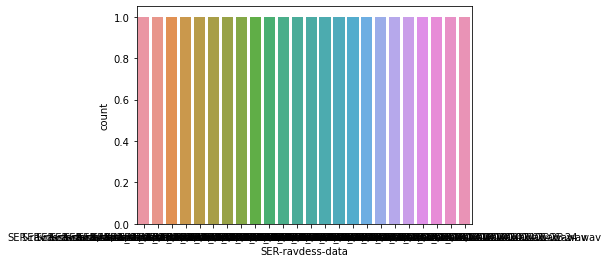

In [12]:
sns.countplot(df['SER-ravdess-data'])

# Exploratory Data Analysis
+ Plotting Waveform and Spectogram
+ Take 7 Actors

In [13]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

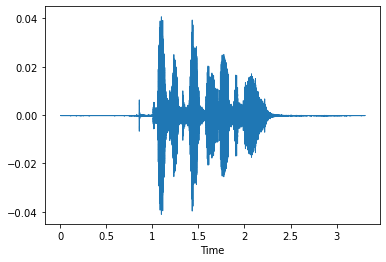

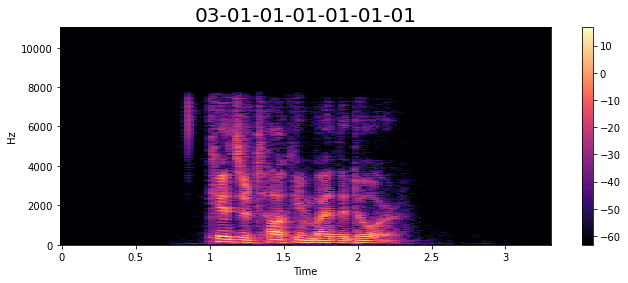

In [14]:
emotion = '03-01-01-01-01-01-01'
path = np.array(df['SER-ravdess-data'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

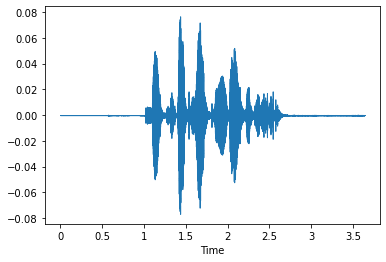

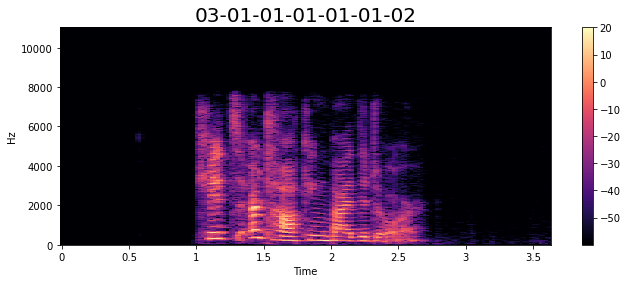

In [15]:
emotion = '03-01-01-01-01-01-02'
path = np.array(df['SER-ravdess-data'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

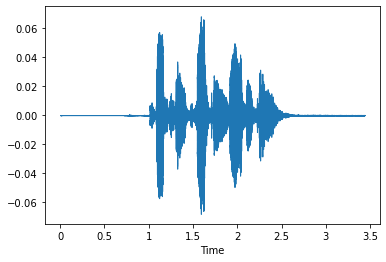

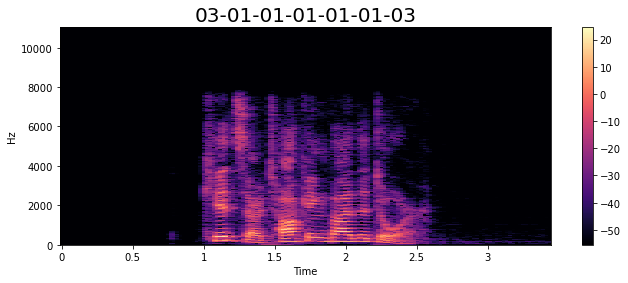

In [16]:
emotion = '03-01-01-01-01-01-03'
path = np.array(df['SER-ravdess-data'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

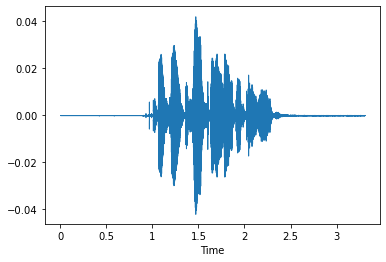

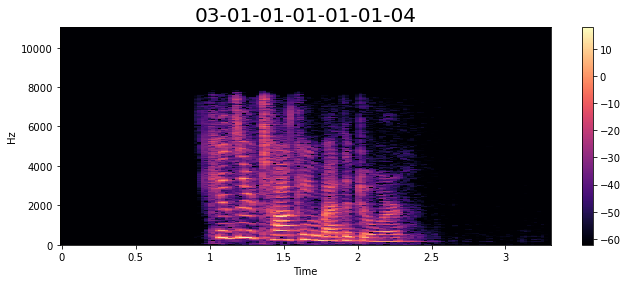

In [17]:
emotion = '03-01-01-01-01-01-04'
path = np.array(df['SER-ravdess-data'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

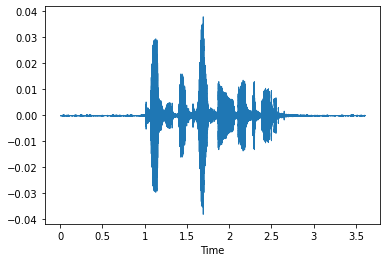

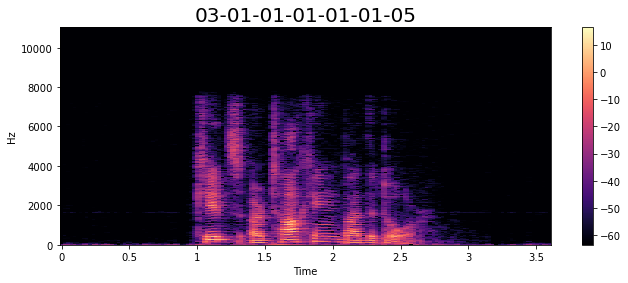

In [18]:
emotion = '03-01-01-01-01-01-05'
path = np.array(df['SER-ravdess-data'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

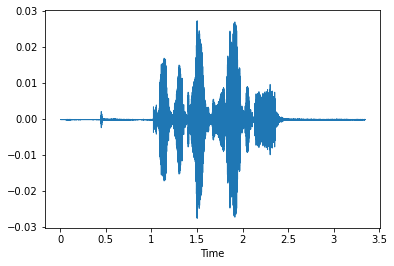

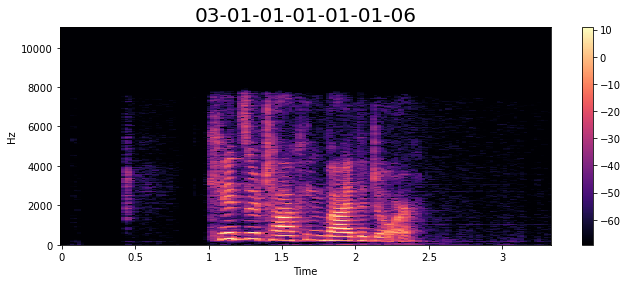

In [19]:
emotion = '03-01-01-01-01-01-06'
path = np.array(df['SER-ravdess-data'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

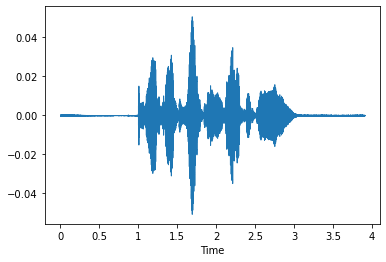

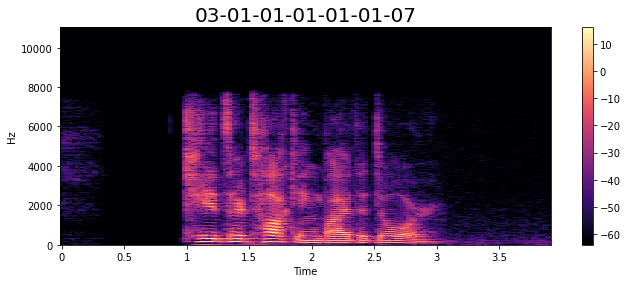

In [20]:
emotion = '03-01-01-01-01-01-07'
path = np.array(df['SER-ravdess-data'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

# Loading all the files in DataSet and get the list

In [21]:
#Loading the required RAVDESS DataSet with length of 1440 Audio Files 
os.listdir(path='.\SER-ravdess-data')
def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

dirName = './SER-ravdess-data'
listOfFiles = getListOfFiles(dirName)
len(listOfFiles)

1440

# Plotting WaveForm

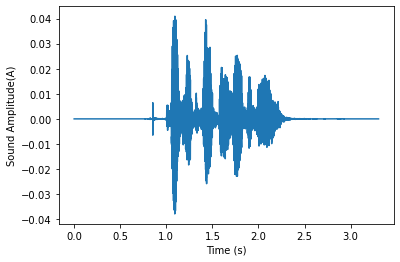

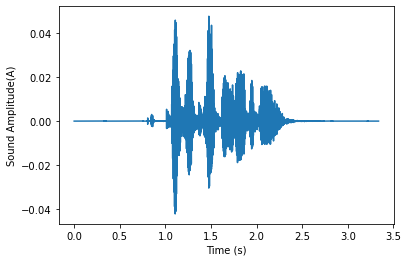

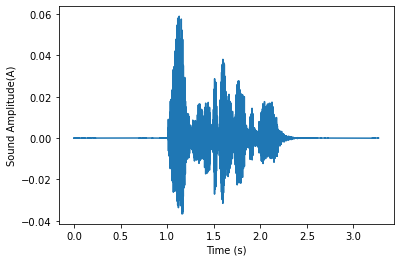

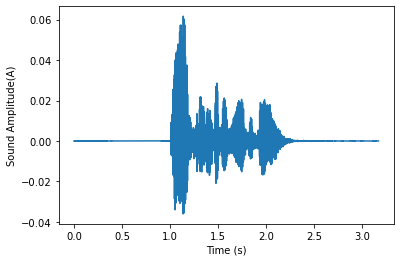

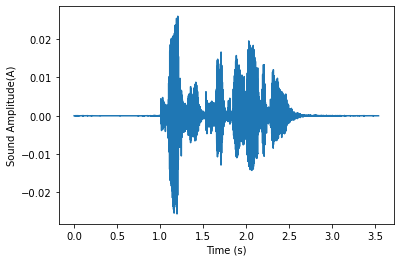

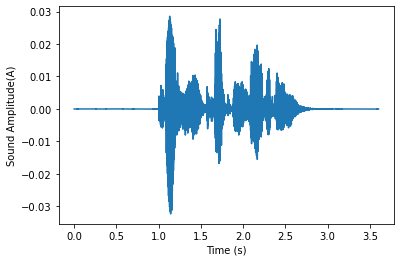

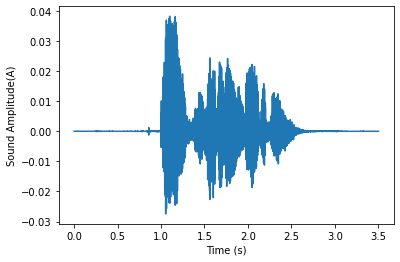

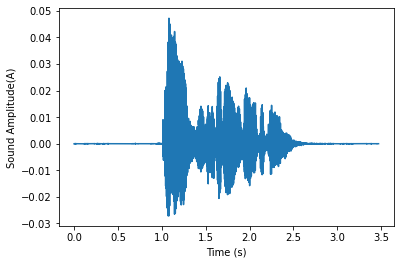

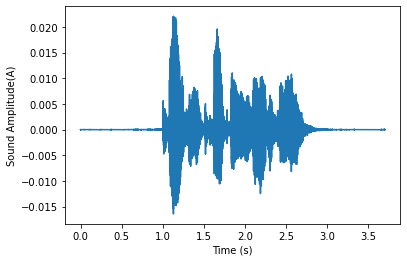

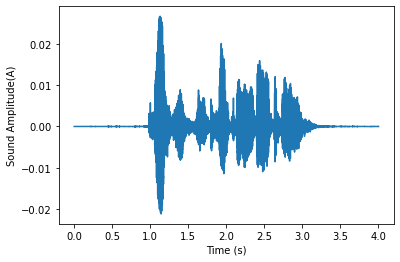

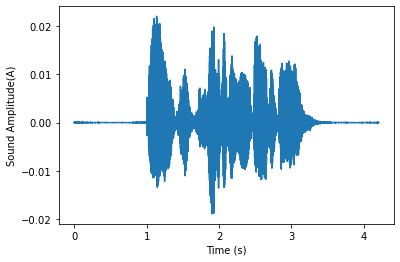

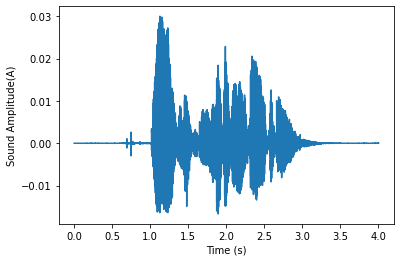

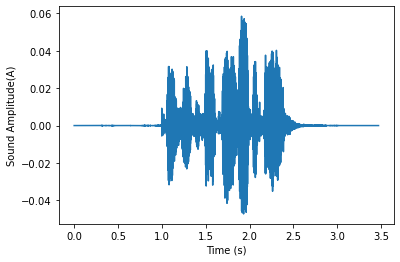

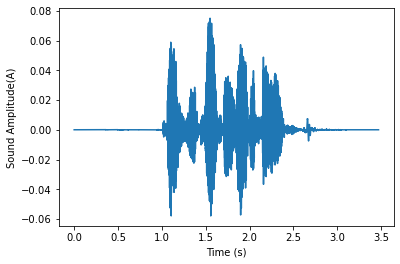

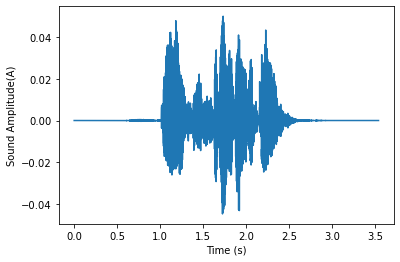

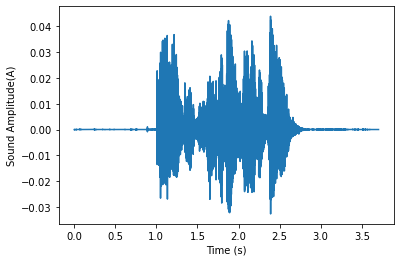

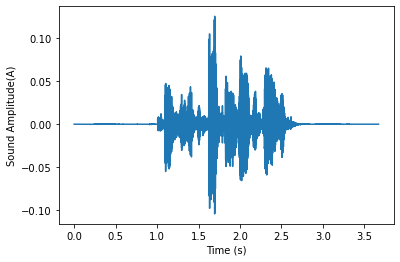

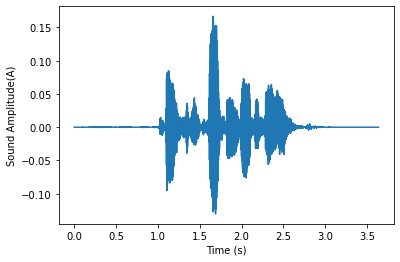

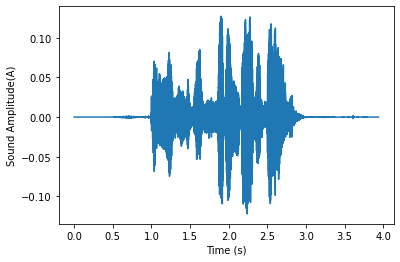

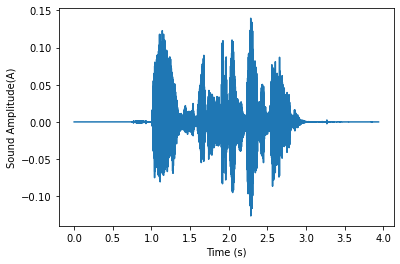

KeyboardInterrupt: 

In [22]:
#Plotting the Wave form Graphs for understanding of Audio Files :
for file in range(0 , len(listOfFiles) , 1):
    audio , sfreq = lr.load(listOfFiles[file])
    time = np.arange(0 , len(audio)) / sfreq
    fig ,ax = plt.subplots()
    ax.plot(time , audio)
    ax.set(xlabel = 'Time (s)' , ylabel = 'Sound Amplitude(A)')
    plt.show()

# Plotting Spectogram

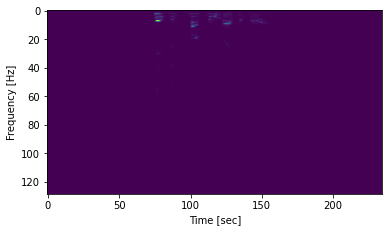

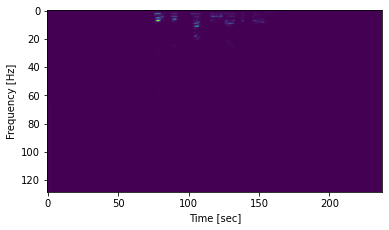

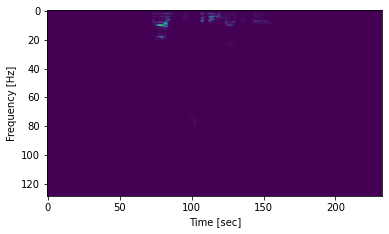

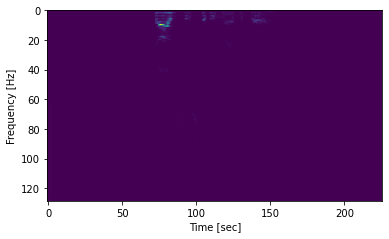

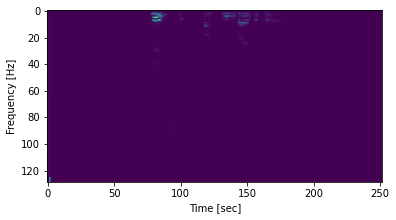

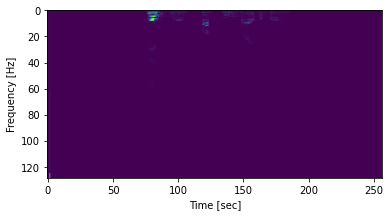

KeyboardInterrupt: 

In [23]:
for file in range(0 , len(listOfFiles) , 1):
     sample_rate , samples = wavfile.read(listOfFiles[file])
     frequencies , times, spectrogram = signal.spectrogram(samples, sample_rate) 
     plt.pcolormesh(times, frequencies, spectrogram)
     plt.imshow(spectrogram)
     plt.ylabel('Frequency [Hz]')
     plt.xlabel('Time [sec]')
     plt.show()

# Using Speech Recognition API we convert audio to text

In [ ]:
#Use the Speech-Recognition API to get the Raw Text from Audio Files, Though Speech Recognition
#is less strong for large chunk of files , so used Error Handling , where when it is not be able to 
#produce the text of a particular Audio File it prints the statement 'error'.Just for understanding Audio
import speech_recognition as sr
r=sr.Recognizer()
for file in range(0 , len(listOfFiles) , 1):
    with sr.AudioFile(listOfFiles[file]) as source:
        audio = r.listen(source)
        try:
            text = r.recognize_google(audio)
            print(text)
        except:
            print('error')

# Deep visualization
+ MFCC
+ LOGFBANK

In [24]:
#Next Step is In-Depth Visualisation of Audio Files and its certain features to plot for.
#They are the Plotting Functions to be called later. 
def plot_signals(signals):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Time Series' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

def plot_fft(fft):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transform' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            data = list(fft.values())[i]
            Y,freq = data[0] , data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq , Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1
    
def plot_fbank(fbank):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i],cmap='hot', interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1
            
def plot_mfccs(mfccs):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Capstrum  Coefficients' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                             cmap='hot', interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

def calc_fft(y,rate):
    n = len(y)
    freq = np.fft.rfftfreq(n , d= 1/rate)
    Y= abs(np.fft.rfft(y)/n)
    return(Y,freq)


# Plot MFCC

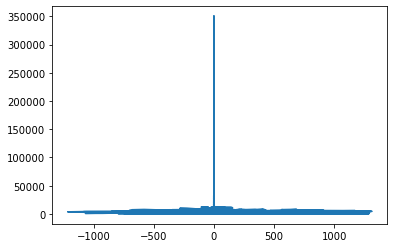

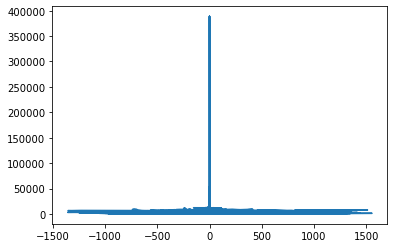

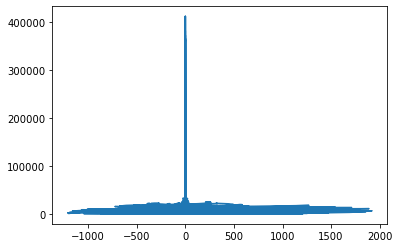

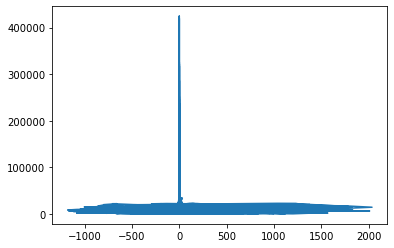

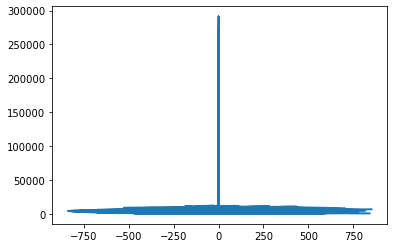

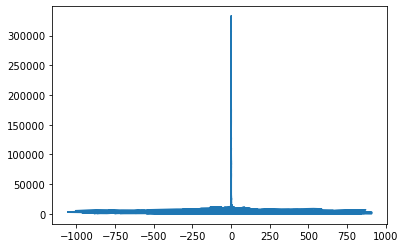

KeyboardInterrupt: 

In [25]:
# Here The Data Set is loaded and plots are Visualised by Calling the Plotting Functions . 
for file in range(0 , len(listOfFiles) , 1):
    rate, data = wav.read(listOfFiles[file])
    fft_out = fft(data)
    %matplotlib inline
    plt.plot(data, np.abs(fft_out))
    plt.show()
    
signals={}
fft={}
fbank={}
mfccs={}
# load data
for file in range(0 , len(listOfFiles) , 1):
#     rate, data = wavfile.read(listOfFiles[file])
     signal,rate =librosa.load(listOfFiles[file] , sr=44100)
     mask = envelope(signal , rate , 0.0005)
     signals[file] = signal
     fft[file] = calc_fft(signal , rate)
    
     bank = logfbank(signal[:rate] , rate , nfilt = 26, nfft = 1103).T
     fbank[file] = bank
     mel = mfcc(signal[:rate] , rate , numcep =13 , nfilt = 26 , nfft=1103).T
     mfccs[file]=mel

plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()

# Cleaning and Masking

In [26]:
#MASK IS TO REMOVE UNNECESSARY EMPTY VOIVES AROUND THE MAIN AUDIO VOICE
#DOWN SAMPLING OF AUDIO FILES IS DONE  AND PUT MASK OVER IT AND DIRECT INTO CLEAN FOLDER
def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

# Storing the cleaned data in a specified folder

In [ ]:
#The clean Audio Files are redirected to Clean Audio Folder Directory 
import glob,pickle
for file in tqdm(glob.glob(r'C:\Users\sunka\Project folder\SER-ravdess-data\\**\\*.wav')):
    file_name = os.path.basename(file)
    signal , rate = librosa.load(file, sr=16000)
    mask = envelope(signal,rate, 0.0005)
    wavfile.write(filename= r'C:\Users\sunka\Project folder\clean_speech\\'+str(file_name), rate=rate,data=signal[mask])

# Extraction Feature

In [27]:
#Feature Extraction of Audio Files Function 
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

# Labels Classification

In [28]:
#Emotions in the RAVDESS dataset to be classified Audio Files based on . 
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#These are the emotions User wants to observe more :
observed_emotions=['calm', 'angry', 'fearful', 'surprised']

# Load the Cleaned Dataset and Split it
## Perform Training and Testing Process

In [29]:
#Load the data and extract features for each sound file
from glob import glob
import os
import glob
def load_data(test_size=0.33):
    x,y=[],[]
    answer = 0
    for file in glob.glob(r'C:\Users\sunka\Project folder\clean_speech\\*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            answer += 1
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append([emotion,file_name])
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

# Mappping the data with their Filename

In [30]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)
print(np.shape(x_train),np.shape(x_test), np.shape(y_train),np.shape(y_test))
y_test_map = np.array(y_test).T
y_test = y_test_map[0]
test_filename = y_test_map[1]
y_train_map = np.array(y_train).T
y_train = y_train_map[0]
train_filename = y_train_map[1]
print(np.shape(y_train),np.shape(y_test))
print(*test_filename,sep="\n")

(576, 180) (192, 180) (576, 2) (192, 2)
(576,) (192,)
03-01-06-01-02-02-01.wav
03-01-05-01-02-01-21.wav
03-01-08-01-02-02-04.wav
03-01-02-02-01-02-24.wav
03-01-08-01-02-02-19.wav
03-01-06-01-01-01-07.wav
03-01-08-01-01-01-16.wav
03-01-02-01-02-02-06.wav
03-01-06-01-01-02-07.wav
03-01-06-02-01-01-15.wav
03-01-02-02-02-02-07.wav
03-01-06-01-02-02-19.wav
03-01-06-02-02-02-05.wav
03-01-06-01-01-01-14.wav
03-01-06-01-02-01-15.wav
03-01-05-02-02-01-06.wav
03-01-02-01-01-02-16.wav
03-01-08-01-01-01-13.wav
03-01-05-02-02-02-24.wav
03-01-02-01-02-02-19.wav
03-01-02-02-01-02-09.wav
03-01-02-01-01-02-07.wav
03-01-05-01-02-01-13.wav
03-01-02-01-02-01-18.wav
03-01-02-02-02-02-03.wav
03-01-02-02-01-01-11.wav
03-01-05-01-02-02-20.wav
03-01-05-02-01-02-06.wav
03-01-06-01-01-02-11.wav
03-01-05-01-02-01-18.wav
03-01-06-01-01-01-15.wav
03-01-08-02-01-02-08.wav
03-01-08-02-01-02-23.wav
03-01-05-01-02-02-10.wav
03-01-06-01-01-01-23.wav
03-01-08-02-02-01-18.wav
03-01-06-02-02-01-22.wav
03-01-08-02-01-01-21.

# Arrays

In [31]:
#Get the shape of the training and testing datasets
# print((x_train.shape[0], x_test.shape[0]))
print((x_train[0], x_test[0]))

(array([-4.14075775e+02,  9.60427322e+01, -1.94220123e+01,  1.89713917e+01,
       -2.32563114e+01, -2.21218071e+01, -1.39978619e+01, -1.57990255e+01,
       -1.79302635e+01, -4.64487314e+00, -1.33515444e+01, -3.48733974e+00,
       -7.55289841e+00, -5.15058851e+00, -4.63276863e+00, -1.18469219e+01,
       -3.36313081e+00, -6.23090267e+00, -8.63777351e+00, -4.10104990e+00,
       -9.27100754e+00, -3.14660430e+00, -1.72652102e+00, -3.55152726e-01,
       -2.39446545e+00,  1.47528160e+00,  1.07435298e+00,  5.28491068e+00,
        8.43703449e-01,  1.98153472e+00,  1.12238836e+00,  2.40574288e+00,
       -7.58131385e-01, -1.00502521e-01, -4.40290272e-01,  5.85999203e+00,
        6.97498751e+00,  6.17765379e+00,  2.01906919e+00,  8.31941664e-01,
        5.99094629e-01,  5.73934734e-01,  6.01778388e-01,  6.46930456e-01,
        6.43658340e-01,  5.83017886e-01,  4.76528525e-01,  4.89761710e-01,
        5.86332202e-01,  6.36571527e-01,  6.41437948e-01,  6.38069034e-01,
        1.00149214e-03, 

In [32]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


# Apply MLP Classifier

In [33]:
# Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300), learning_rate='adaptive', max_iter=500)

In [34]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=300,
              learning_rate='adaptive', max_iter=500)

# Saving the model

In [35]:
import pickle
# Save the Model to file in the current working directory
# For any new testing data other than the data in dataset

Pkl_Filename = "Emotion_Voice_Detection_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [36]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as pickle_file:  
    Emotion_Voice_Detection_Model = pickle.load(pickle_file)

Emotion_Voice_Detection_Model

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=300,
              learning_rate='adaptive', max_iter=500)

# Predict the test data using saved model

In [37]:
#predicting
y_pred=Emotion_Voice_Detection_Model.predict(x_test)
y_pred

array(['fearful', 'angry', 'surprised', 'calm', 'surprised', 'calm',
       'surprised', 'calm', 'fearful', 'fearful', 'calm', 'fearful',
       'fearful', 'fearful', 'fearful', 'angry', 'calm', 'surprised',
       'angry', 'calm', 'calm', 'calm', 'angry', 'calm', 'calm', 'calm',
       'angry', 'angry', 'angry', 'angry', 'fearful', 'surprised',
       'surprised', 'angry', 'fearful', 'surprised', 'fearful',
       'surprised', 'surprised', 'fearful', 'surprised', 'angry',
       'surprised', 'fearful', 'fearful', 'calm', 'fearful', 'surprised',
       'calm', 'calm', 'fearful', 'angry', 'calm', 'calm', 'surprised',
       'surprised', 'angry', 'calm', 'angry', 'calm', 'calm', 'angry',
       'angry', 'fearful', 'calm', 'fearful', 'calm', 'angry', 'fearful',
       'fearful', 'surprised', 'calm', 'calm', 'calm', 'surprised',
       'calm', 'angry', 'surprised', 'calm', 'surprised', 'angry',
       'angry', 'fearful', 'angry', 'fearful', 'fearful', 'surprised',
       'surprised', 'surp

# Predicted Accuracy 

In [38]:
accuracy=accuracy_score(y_true=y_test,y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 85.42%


# Classification Report

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       angry       0.80      0.78      0.79        41
        calm       0.91      0.91      0.91        54
     fearful       0.88      0.85      0.87        53
   surprised       0.81      0.86      0.84        44

    accuracy                           0.85       192
   macro avg       0.85      0.85      0.85       192
weighted avg       0.85      0.85      0.85       192



# Predicting emotion for all the files in cleaned dataset and its array

In [40]:
#Load the data set
x_train,x_test,y_train,y_test=load_data(test_size=0.25)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[-4.14075775e+02  9.60427322e+01 -1.94220123e+01 ...  3.99622986e-05
   2.27494111e-05  1.50691931e-05]
 [-3.28184875e+02  7.11086273e+01 -1.03481369e+01 ...  9.69593471e-04
   5.35311701e-04  1.88865204e-04]
 [-3.29781708e+02  5.33141441e+01 -1.75699878e+00 ...  7.00354401e-04
   4.31872642e-04  2.76964362e-04]
 ...
 [-3.80682953e+02  1.00706055e+02 -3.18772869e+01 ...  8.74658654e-05
   3.48621470e-05  2.28707177e-05]
 [-1.89200760e+02  3.49225044e+01 -3.00743809e+01 ...  4.67678159e-03
   3.11693503e-03  1.87940791e-03]
 [-2.26240662e+02  4.40849533e+01 -4.14667053e+01 ...  2.14148918e-03
   1.13886769e-03  6.84457656e-04]]
[[-4.05671173e+02  8.42834015e+01 -1.11281261e+01 ...  1.84674020e-04
   1.15834977e-04  6.19591956e-05]
 [-2.43816254e+02  7.08907471e+01 -2.24826889e+01 ...  1.05612520e-02
   4.73831268e-03  4.43566591e-03]
 [-3.22447174e+02  5.93234825e+01 -3.97558403e+01 ...  3.36979894e-04
   4.21871053e-04  5.43484348e-04]
 ...
 [-2.90466614e+02  2.36243939e+00 -6.1605842

# Store the Predicted file in .csv file

In [41]:
#Store the Prediction probabilities into CSV file 
import numpy as np
import pandas as pd
y_pred1 = pd.DataFrame(y_pred, columns=['predictions'])
y_pred1['file_names'] = test_filename
print(y_pred1)
y_pred1.to_csv('predictionfinal.csv')

    predictions                file_names
0       fearful  03-01-06-01-02-02-01.wav
1         angry  03-01-05-01-02-01-21.wav
2     surprised  03-01-08-01-02-02-04.wav
3          calm  03-01-02-02-01-02-24.wav
4     surprised  03-01-08-01-02-02-19.wav
..          ...                       ...
187   surprised  03-01-08-01-02-02-14.wav
188       angry  03-01-05-02-02-02-02.wav
189     fearful  03-01-06-02-01-01-14.wav
190   surprised  03-01-08-01-01-02-02.wav
191        calm  03-01-02-02-02-01-22.wav

[192 rows x 2 columns]


In [42]:
#predict first 10 wav files
y_pred1[:10]

,predictions,file_names
0,fearful,03-01-06-01-02-02-01.wav
1,angry,03-01-05-01-02-01-21.wav
2,surprised,03-01-08-01-02-02-04.wav
3,calm,03-01-02-02-01-02-24.wav
4,surprised,03-01-08-01-02-02-19.wav
5,calm,03-01-06-01-01-01-07.wav
6,surprised,03-01-08-01-01-01-16.wav
7,calm,03-01-02-01-02-02-06.wav
8,fearful,03-01-06-01-01-02-07.wav
9,fearful,03-01-06-02-01-01-15.wav


# Apply the Extract Feature to the random file and predict the result for
# live demo audio ^-^

In [51]:
import pyaudio
import os
import wave
import pickle
from sys import byteorder
from array import array
from struct import pack
from sklearn.neural_network import MLPClassifier


THRESHOLD = 500
CHUNK_SIZE = 1024
FORMAT = pyaudio.paInt16
RATE = 16000

SILENCE = 30

def is_silent(snd_data):
    "Returns 'True' if below the 'silent' threshold"
    return max(snd_data) < THRESHOLD

def normalize(snd_data):
    "Average the volume out"
    MAXIMUM = 16384
    times = float(MAXIMUM)/max(abs(i) for i in snd_data)

    r = array('h')
    for i in snd_data:
        r.append(int(i*times))
    return r

def trim(snd_data):
    "Trim the blank spots at the start and end"
    def _trim(snd_data):
        snd_started = False
        r = array('h')

        for i in snd_data:
            if not snd_started and abs(i)>THRESHOLD:
                snd_started = True
                r.append(i)

            elif snd_started:
                r.append(i)
        return r

    # Trim to the left
    snd_data = _trim(snd_data)

    # Trim to the right
    snd_data.reverse()
    snd_data = _trim(snd_data)
    snd_data.reverse()
    return snd_data

def add_silence(snd_data, seconds):
    "Add silence to the start and end of 'snd_data' of length 'seconds' (float)"
    r = array('h', [0 for i in range(int(seconds*RATE))])
    r.extend(snd_data)
    r.extend([0 for i in range(int(seconds*RATE))])
    return r

def record():
    """
    Record a word or words from the microphone and 
    return the data as an array of signed shorts.
    Normalizes the audio, trims silence from the 
    start and end, and pads with 0.5 seconds of 
    blank sound to make sure VLC et al can play 
    it without getting chopped off.
    """
    p = pyaudio.PyAudio()
    stream = p.open(format=FORMAT, channels=1, rate=RATE,
        input=True, output=True,
        frames_per_buffer=CHUNK_SIZE)

    num_silent = 0
    snd_started = False

    r = array('h')

    while 1:
        # little endian, signed short
        snd_data = array('h', stream.read(CHUNK_SIZE))
        if byteorder == 'big':
            snd_data.byteswap()
        r.extend(snd_data)

        silent = is_silent(snd_data)

        if silent and snd_started:
            num_silent += 1
        elif not silent and not snd_started:
            snd_started = True

        if snd_started and num_silent > SILENCE:
            break

    sample_width = p.get_sample_size(FORMAT)
    stream.stop_stream()
    stream.close()
    p.terminate()

    r = normalize(r)
    r = trim(r)
    r = add_silence(r, 0.5)
    return sample_width, r

def record_to_file(path):
    "Records from the microphone and outputs the resulting data to 'path'"
    sample_width, data = record()
    data = pack('<' + ('h'*len(data)), *data)

    wf = wave.open(path, 'wb')
    wf.setnchannels(1)
    wf.setsampwidth(sample_width)
    wf.setframerate(RATE)
    wf.writeframes(data)
    wf.close()




# Predicting emotion

In [52]:

if __name__ == "__main__":
    # load the saved model (after training)
    model = pickle.load(open("Emotion_Voice_Detection_Model.pkl", "rb"))
    print("Please talk")
    filename = "test.wav"
    # record the file (start talking)
    record_to_file(filename)
    # extract features and reshape it
    features = extract_feature(filename, mfcc=True, chroma=True, mel=True).reshape(1, -1)
    # predict
    result = model.predict(features)[0]
    # show the result!
    print("result:", result)

Please talk
result: calm


# Recognize audio and convert into text

In [53]:
import speech_recognition as sr
r = sr.Recognizer()
with sr.AudioFile('test.wav') as source:
    audio = r.listen(source)
    try:
        text = r.recognize_google(audio)
        print(text)
    except:
        print("Sorry could not recognize")

Sorry could not recognize


# Plot the waveform and spectrogram

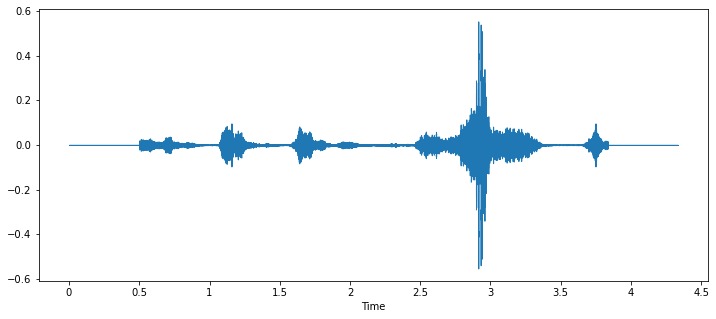

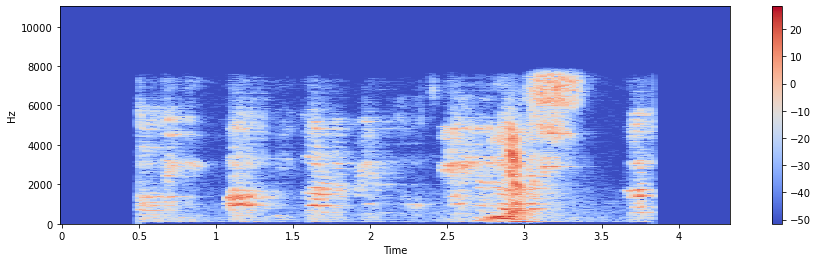

In [55]:
import os
import pandas as pd
import librosa
import librosa.display
import glob 
#The file 'output10.wav' in the next cell is the file that was recorded live using the code :
data, sampling_rate = librosa.load('test.wav')
%matplotlib inline
plt.figure(figsize=(12, 5))
librosa.display.waveshow(data, sr=sampling_rate)
x = librosa.stft(data)
xdb = librosa.amplitude_to_db(abs(x))
plt.figure(figsize=(15,4))
librosa.display.specshow(xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()
Audio('test.wav')